In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

In [8]:
df = wrangle.get_zillow_data()

In [9]:
df.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County_Code
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [10]:
df = wrangle.prepare_zillow_data(df)

In [11]:
df.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County
4,4,2.0,3633,296425,2005,6941.39,Los Angeles County
6,3,4.0,1620,847770,2011,10244.94,Los Angeles County
7,3,2.0,2077,646760,1926,7924.68,Los Angeles County
18,3,1.0,1244,169471,1950,2532.88,Los Angeles County
19,3,2.0,1300,233266,1950,3110.99,Los Angeles County


In [12]:
train, validate, test = wrangle.split_zillow_data(df)

### Exploration
 - Hypothesese: 
 - Bedroom number is correlated with bathroom number.
 - Square footage and value are related
 - Taxes are dependent on the county.
         
 

<AxesSubplot:xlabel='Number_of_Bedrooms', ylabel='Tax_Appraised_Value'>

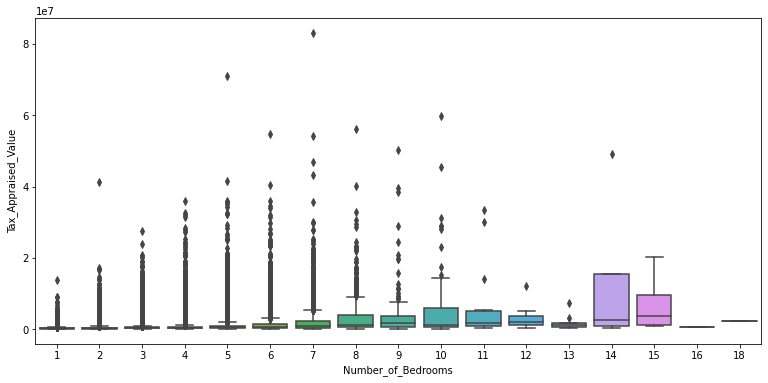

In [20]:
plt.figure(figsize=(13, 6))
sns.boxplot(data = train, x = train.Number_of_Bedrooms, y = train.Tax_Appraised_Value) 

<AxesSubplot:xlabel='Number_of_Bathrooms', ylabel='Tax_Appraised_Value'>

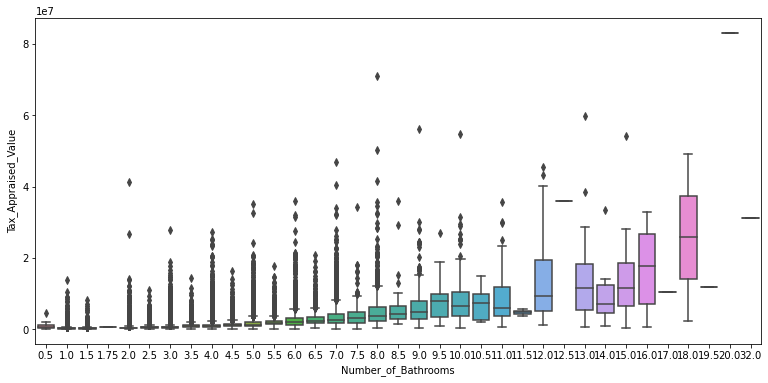

In [21]:
plt.figure(figsize=(13, 6))
sns.boxplot(data = train, x = train.Number_of_Bathrooms, y = train.Tax_Appraised_Value) 

<AxesSubplot:xlabel='County', ylabel='Tax_Appraised_Value'>

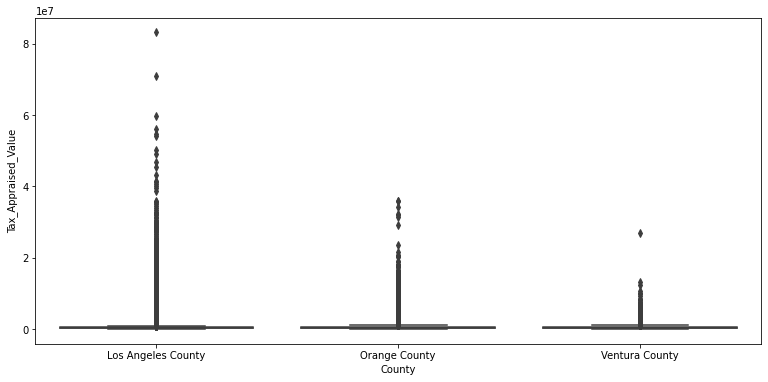

In [44]:
plt.figure(figsize=(13, 6))
sns.boxplot(data = train, x = train.County, y = train.Tax_Appraised_Value) 

In [55]:
train.groupby(by='County').Tax_Appraised_Value.median()

County
Los Angeles County    296000.0
Orange County         406055.5
Ventura County        372000.0
Name: Tax_Appraised_Value, dtype: float64